<a href="https://colab.research.google.com/github/gillesvtsilvano/Machine-Learning/blob/master/EEC1509_MachineLearning_Lesson_08_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/ivanovitchm/EEC1509_MachineLearning.git
 
import os
os.chdir('EEC1509_MachineLearning/Lesson #08 Clustering')

Cloning into 'EEC1509_MachineLearning'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 86 (delta 2), reused 16 (delta 2), pack-reused 70
Unpacking objects: 100% (86/86), done.


In [0]:
"""Import the Pandas library.
Use the read_csv() method in Pandas to read 114_congress.csv into the variable votes."""

import pandas as pd

votes = pd.read_csv('114_congress.csv')

In [0]:
votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [0]:
"""Find how many Senators are in each party.
Use the value_counts() method on the party column of votes. Print the results.
Find what the "average" vote for each bill was.
Use the mean() method on the votes Dataframe. If the mean for a column is less than .5, more Senators voted against the bill, and vice versa if it's over .5. Print the results."""

votes.party.value_counts()

against_bill = votes.mean() < 0.5
print(against_bill)

R    54
D    44
I     2
Name: party, dtype: int64

In [0]:
"""Compute the Euclidean distance between the first row and the third row.
Assign the result to distance.
tip: use series.values.reshape(1,-1) in euclidean_distance parameters"""
from sklearn.metrics.pairwise import euclidean_distances

first_row, third_row = votes.iloc[0][3:], votes.iloc[2][3:]

euclidean_distances(first_row.reshape(1, -1), third_row.reshape(1, -1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


array([[3.31662479]])

In [0]:
"""Use the fit_transform() method to fit kmeans_model on the votes DataFrame. Only select columns after the first 3 from votes when fitting.
Assign the result to senator_distances."""

from sklearn.cluster import KMeans
import numpy as np

kmeans_model = KMeans(n_clusters=2, random_state=1)

senator_distances = kmeans_model.fit_transform(votes.iloc[:, 3:])

In [0]:
"""Use the labels_ attribute to extract the labels from kmeans_model. Assign the result to the variable labels.
Use the crosstab() method to print out a table comparing labels to votes["party"], in that order."""

labels = kmeans_model.labels_

pd.crosstab(labels, votes['party'])

party,D,I,R
row_0,,,
0,41,2,0
1,3,0,54


In [0]:
"""Select all senators who were assigned to the second cluster that were Democrats. Assign the subset to democratic_outliers.
Print out democratic_outliers."""

print(votes[(labels == 1) & (votes['party'] == 'D')])

        name party state  00001  00004  00005  00006  00007  00008  00009  \
42  Heitkamp     D    ND    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
56   Manchin     D    WV    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
74      Reid     D    NV    0.5    0.5    0.5    0.5    0.5    0.5    0.5   

    00010  00020  00026  00032  00038  00039  00044  00047  
42    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0  
56    1.0    1.0    0.0    0.0    1.0    1.0    0.0    0.0  
74    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5  


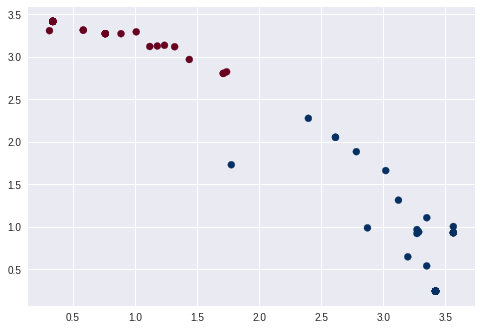

In [0]:
"""Make a scatterplot using plt.scatter(). Pass in the following keyword arguments:
x should be the first column of senator_distances.
y should be the second column of senator_distances.
c should be labels. This will shade the points according to label.
cmap should be set to "RdBu"
Use plt.show() to show the plot."""

import matplotlib.pyplot as plt

#senator_distances[:, 0]

plt.scatter(senator_distances[:, 0], senator_distances[:, 1], c=labels.transpose(), cmap='RdBu')
plt.show()


In [0]:
"""Compute an extremism rating by cubing every value in senator_distances, then finding the sum across each row. Assign the result to extremism.
Assign the extremism variable to the extremism column of votes.
Sort votes on the extremism column, in descending order, using the sort_values() method on DataFrames.
Print the top 10 most extreme Senators."""

extremism = np.sum(senator_distances ** 3, axis=1)
votes['extremism'] = extremism

votes.sort_values('extremism', ascending=False).head(10)

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047,extremism
98,Wicker,R,MS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.250476
53,Lankford,R,OK,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
69,Paul,R,KY,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
80,Sasse,R,NE,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
26,Cruz,R,TX,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
48,Johnson,R,WI,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
47,Isakson,R,GA,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
65,Murkowski,R,AK,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
64,Moran,R,KS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
30,Enzi,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540


In [0]:

import pandas as pd
import numpy as np

# visualize more columns
pd.set_option('display.max_columns', 50)

nba = pd.read_csv("nba_2013.csv")
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


In [0]:
"""Create a new Dataframe which contains just the point guards from the data set.
Point guards are specified as PG in the pos column.
Assign the filtered data frame to point_guards."""

point_guards = nba[nba['pos'] == 'PG']

In [0]:
"""While our dataset doesn't come with Points Per Game values, we can easily calculate those using each player's total points (pts) and the number of games (g) they played. Let's take advantage of pandas' ability to multiply and divide columns to create the Points Per Game ppg column by dividing the pts and g columns."""

point_guards['ppg'] = point_guards['pts'] / point_guards['g']
point_guards.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end,ppg
24,D.J. Augustin,PG,26,TOT,71,9,1939,298,718,0.415,133,332,0.400602,165,386,0.427461,0.508,201,227,0.885,15,115,130,313,53,3,125,147,930,2013-2014,2013,13.098592
29,Leandro Barbosa,PG,31,PHO,20,0,368,56,131,0.427,7,25,0.280000,49,106,0.462264,0.454,31,39,0.795,5,32,37,32,7,4,19,30,150,2013-2014,2013,7.500000
30,Jose Barea,PG,29,MIN,79,1,1471,254,656,0.387,73,231,0.316017,181,425,0.425882,0.443,79,100,0.790,16,138,154,303,26,0,125,129,660,2013-2014,2013,8.354430
38,Jerryd Bayless,PG,25,TOT,72,19,1686,248,617,0.402,76,212,0.358491,172,405,0.424691,0.464,94,118,0.797,22,123,145,194,60,9,82,161,666,2013-2014,2013,9.250000
50,Steve Blake,PG,33,TOT,55,28,1498,133,353,0.377,79,210,0.376190,54,143,0.377622,0.489,33,43,0.767,13,146,159,307,54,8,102,85,378,2013-2014,2013,6.872727


In [0]:
"""Drop the players who have 0 turnovers.
Not only did these players only play a few games, making it hard to understand their true abilities, but we also cannot divide by 0 when we calculate atr.
Utilize the same division technique we used with Points Per Game to create the Assist Turnover Ratio (atr) column for point_guards."""

tov_0 = point_guards[point_guards['tov'] == 0]
#tov_0
point_guards.drop(tov_0.index.values.tolist(), inplace=True) # Drop #109 397 456
point_guards['atr'] = point_guards['ast'] / point_guards['tov']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


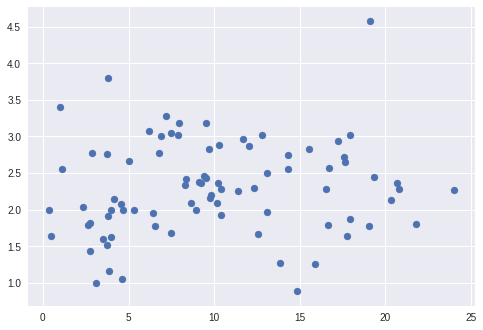

In [0]:
plt.scatter(point_guards['ppg'], point_guards['atr'])
plt.show()

In [0]:
num_clusters = 5

# Use numpy's random function to generate a list, 
# length: num_clusters, of indices
random_initial_points = np.random.choice(point_guards.index, size=num_clusters)

# Use the random indices to create the centroids
centroids = point_guards.loc[random_initial_points]

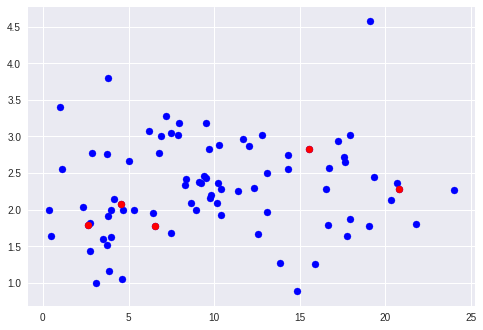

In [0]:
"""Plot a scatter figure using ppg and atr from point_guards.
In the same figure, create a scatter plot using ppg and atr from centroids."""

plt.scatter(point_guards['ppg'], point_guards['atr'], c='b')
plt.scatter(centroids['ppg'], centroids['atr'], c='r')
plt.show()

In [0]:
def centroids_to_dict(centroids):
    dictionary = dict()
    # iterating counter we use to generate a cluster_id
    counter = 0

    # iterate a pandas data frame row-wise using .iterrows()
    for index, row in centroids.iterrows():
        coordinates = [row['ppg'], row['atr']]
        dictionary[counter] = coordinates
        counter += 1

    return dictionary

centroids_dict = centroids_to_dict(centroids)

In [0]:
import math

def calculate_distance(centroid, player_values):
    root_distance = 0
    
    for x in range(0, len(centroid)):
        difference = centroid[x] - player_values[x]
        squared_difference = difference**2
        root_distance += squared_difference

    euclid_distance = math.sqrt(root_distance)
    return euclid_distance

q = [5, 2]
p = [3,1]

# Sqrt(5) = ~2.24
print(calculate_distance(q, p))

2.23606797749979


In [0]:
def assign_to_cluster(row):
    lowest_distance = -1
    closest_cluster = -1
    
    for cluster_id, centroid in centroids_dict.items():
        df_row = [row['ppg'], row['atr']]
        euclidean_distance = calculate_distance(centroid, df_row)
        
        if lowest_distance == -1:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id 
        elif euclidean_distance < lowest_distance:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id
    return closest_cluster

point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


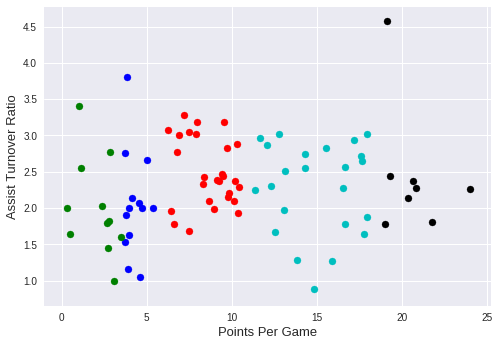

In [0]:
# Visualizing clusters
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['ppg'], clustered_df['atr'], c=colors[n-1])
        plt.xlabel('Points Per Game', fontsize=13)
        plt.ylabel('Assist Turnover Ratio', fontsize=13)
    plt.show()

visualize_clusters(point_guards, 5)

In [0]:
def recalculate_centroids(df):
    new_centroids_dict = dict()
    
    for cluster_id in range(0, num_clusters):
        values_in_cluster = df[df['cluster'] == cluster_id]
        # Calculate new centroid using mean of values in the cluster
        new_centroid = [np.average(values_in_cluster['ppg']), 
                        np.average(values_in_cluster['atr'])]
        new_centroids_dict[cluster_id] = new_centroid
    return new_centroids_dict

centroids_dict = recalculate_centroids(point_guards)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


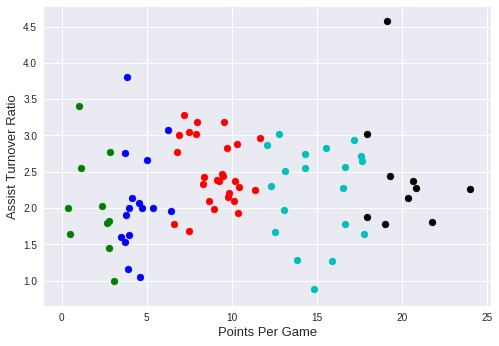

In [0]:
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


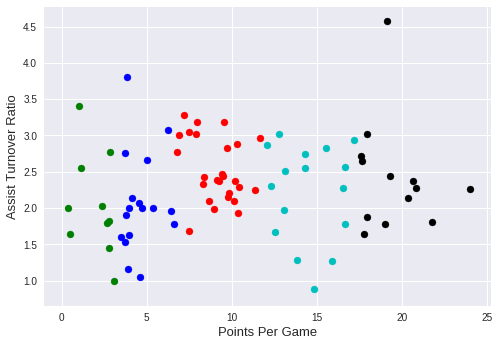

In [0]:
centroids_dict = recalculate_centroids(point_guards)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


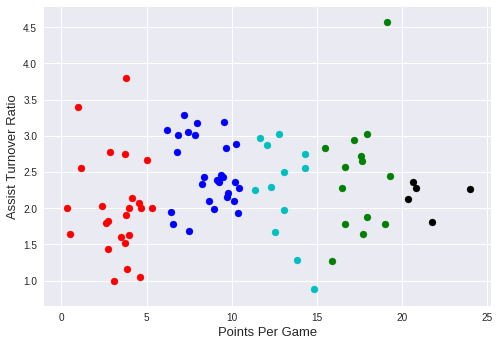

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(point_guards[['ppg', 'atr']])
point_guards['cluster'] = kmeans.labels_

visualize_clusters(point_guards, num_clusters)
